# Analysis of South African Covid-19 Datasets

The outbreak of the Covid-19 pandemic has been an unprecendented event in our lives.  While this event is first and foremost a human tragegy, humanity's collective response to this pandememic will shape our lives in the months and years to come.   In order to gain deeper insight into the factors that are shaping our response, be it in the medical, government or social spheres, it is vital to analyse the data that is being gathered as this crises evolves. 
This objective of this data analysis should not only be limited to guiding policy decisions but to also strenghten the spirit of enquiry, curiosity and exploration in our society so that all of us are empowered to ask our own questions and seek answers.

To aid this endevour, this Jupyter notebook makes uses of publicity available data sets and provides a programmatic framework for data analyts and data scientists to explore and visualize the data.    As this notebook evolves, we will also explore further trends and patterns in these data sets that could be used to guide decision making. 



Contributors:  
1. Karthikeyan V,  Wits University and Accenture
2. Mohamed H. Essop, Accenture 
3. Dylan van Zijl, Accenture

# Source of data
Data Science for Social Impact Research Group @ University of Pretoria, Coronavirus COVID-19 (2019-nCoV) Data Repository for South Africa. Available on: https://github.com/dsfsi/covid19za.


# Part 1: Preliminary Data Exploration and Data Wrangling

# Some early questions to be considered
1. How have the number of infections evolved on a daily basis?  How are the infections distributed across the different provinces in SA? 
2. What were the sources of these infections?  Global, local travel or community infections? 
3. What do the demographics of the infected persons tell us?  Does age or gender influence the possibility of getting infected? 
4. What is the trend of deaths that have occured thus far?   How does this trend compare to global trends?   Are there other factors that increase the chances of death when infected such as co-morbidity (or having a pre-existing medical condition)? 

In [49]:
import pandas as pd
import matplotlib as plt
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

# How has the number of infections grown over time? 

In [50]:
df = pd.read_csv('covid19za_provincial_cumulative_timeline_confirmed.csv')
df.head()

,date,YYYYMMDD,EC,FS,GP,KZN,LP,MP,NC,NW,WC,UNKNOWN,total
0,05-03-2020,20200305,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,07-03-2020,20200307,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2
2,08-03-2020,20200308,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,3
3,09-03-2020,20200309,0.0,0.0,1.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,7
4,11-03-2020,20200311,0.0,0.0,5.0,7.0,0.0,0.0,0.0,0.0,1.0,0.0,13


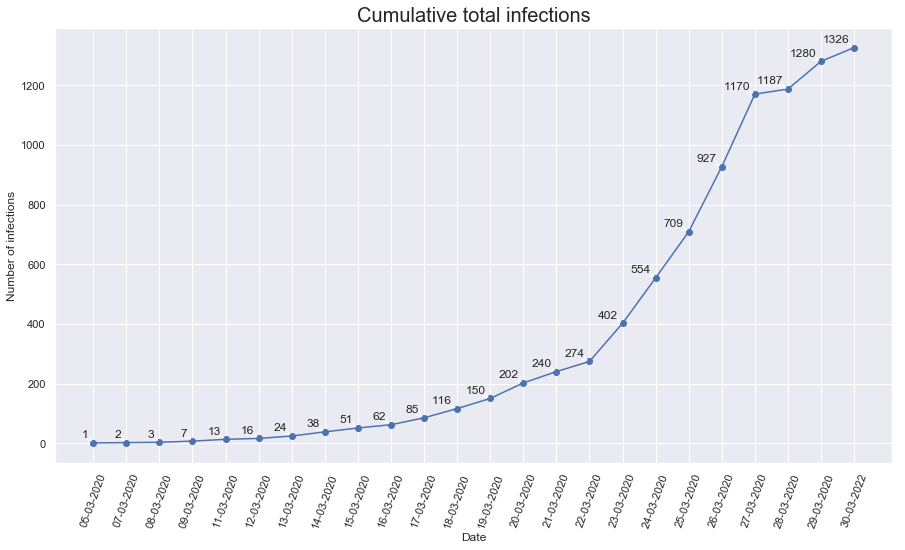

In [51]:
fig = plt.figure(figsize=[15,8]);
cov_date = pd.Series(df.total.values, index=df.date)
plt.xlabel('Date')
plt.tick_params(axis='x', rotation=70)
plt.ylabel('Number of infections')
plt.title('Cumulative total infections', fontsize=20)
for index, row in df.iterrows():
    plt.annotate('{}'.format(row['total']), xy=(row['date'], row['total']), xytext=(-5, 5), ha='right', textcoords='offset points', arrowprops=dict(arrowstyle='->', shrinkA=0))
    #plt.text(row['date'], row['total'], row['total'])
plt.plot(cov_date, 'o-')

# How many people have been tested for presence of the infection so far? 

In [52]:
df = pd.read_csv('covid19za_timeline_testing.csv')
df.head()

,date,YYYYMMDD,cumulative_tests,recovered,hospitalisation,critical_icu,ventilation,deaths,contacts_identified,contacts_traced,scanned_travellers,passengers_elevated_temperature,covid_suspected_criteria
0,11-02-2020,20200211,61.0,0,NaN,0.0,0.0,0,NaN,NaN,NaN,NaN,NaN
1,13-02-2020,20200213,67.0,0,NaN,0.0,0.0,0,NaN,NaN,NaN,NaN,NaN
2,14-02-2020,20200214,71.0,0,NaN,0.0,0.0,0,NaN,NaN,NaN,NaN,NaN
3,19-02-2020,20200219,95.0,0,NaN,0.0,0.0,0,NaN,NaN,NaN,NaN,NaN
4,20-02-2020,20200220,106.0,0,NaN,0.0,0.0,0,NaN,NaN,NaN,NaN,NaN


# How quickly are we testing for potential infections? 

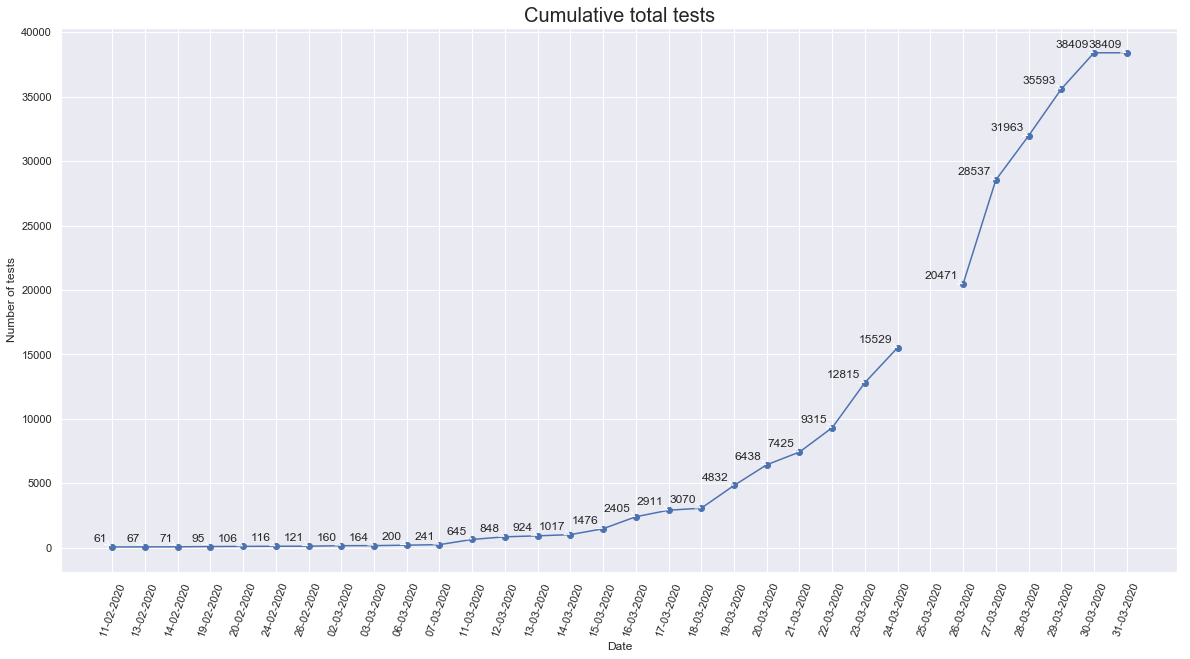

In [53]:
fig = plt.figure(figsize=[20,10]);
cov_date = pd.Series(df.cumulative_tests.values, index=df.date)
plt.xlabel('Date')
plt.tick_params(axis='x', rotation=70)
plt.ylabel('Number of tests')
plt.title('Cumulative total tests', fontsize=20)
for index, row in df.iterrows():
    if (not pd.isna(row['cumulative_tests'])):
    #print(row['date'], row['total'])
        plt.annotate('{:d}'.format(int(row['cumulative_tests'])), xy=(row['date'], row['cumulative_tests']),
                     xytext=(-5, 5), ha='right', textcoords='offset points', arrowprops=dict(arrowstyle='->', shrinkA=1))
        #plt.text(row['date'], row['total'], row['total'])
plt.plot(cov_date, 'o-')

The gap in the graph is due to missing data for that particular day. 

# What is the distribution of age among the infected people? 

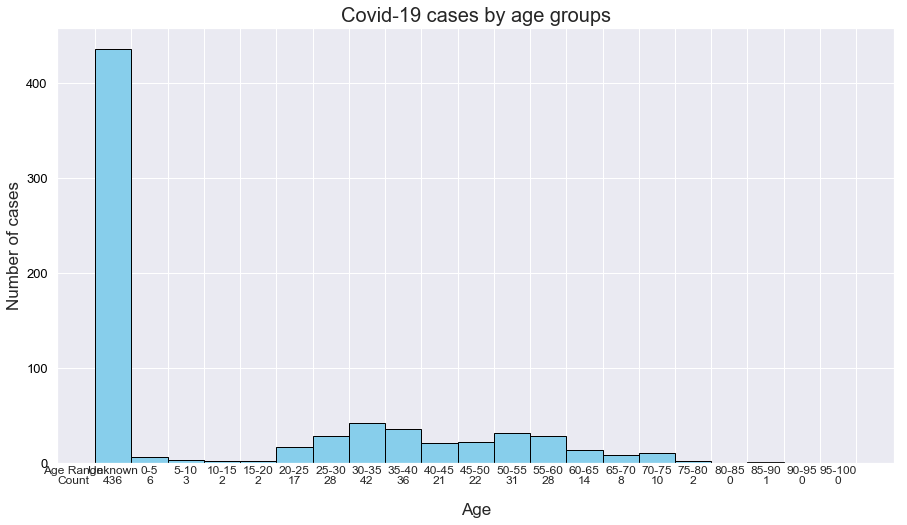

In [54]:
fig, ax = plt.subplots(1,1,figsize=(15,8))
# read csv
df = pd.read_csv('covid19za_timeline_confirmed.csv')

# replace missing age values with -5
values = {'age':-5}
df = df.fillna(value=values)

# create age bins [0,5,10....] and labels [0-4,5-9,10-14 etc]
bins = [-5]
labels = ['Unknown']
for i in range(101):
    if i%5 == 0:
        bins.append(int(i))
        if(len(bins)>2):
            labels.append(f"{str(bins[-2])}-{str(bins[-1])}")
    else:
        continue

# Set the ticks to be at the edges of the bins.
ax.set_xticks(bins)

# add column to AgeGroups column to df and group all entries into the age bins [0-4, 5-9, 10-14 etc]
df['AgeGroup'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# draw histogram
plt.title('Covid-19 cases by age groups', fontsize=20)
plt.xlabel('Age Group', fontsize=17)
plt.ylabel('Number of cases', fontsize=17)
counts, bins, patches = plt.hist(df['age'], bins, color = "skyblue", ec='black')

# Label the raw counts and age groups below the x-axis...
bin_centers = 0.5 * np.diff(bins) + bins[:-1]
for count, x, label in zip(counts, bin_centers, labels):
    # Label the raw counts
    #ax.annotate(str(label) + '= ' + str(int(count)), xy=(x, 0), xycoords=('data', 'axes fraction'), xytext=(0, -3), textcoords='offset points', va='top', ha='center', rotation=270)
    ax.annotate(str(label), xy=(x, 0), xycoords=('data', 'axes fraction'), xytext=(0, -3), textcoords='offset points', va='top', ha='center')
    ax.annotate(str(int(count)), xy=(x, 0), xycoords=('data', 'axes fraction'), xytext=(0, -13), textcoords='offset points', va='top', ha='center')
ax.annotate('Age Range', xy=(-8, 0), xycoords=('data', 'axes fraction'), xytext=(0, -3), textcoords='offset points', va='top', ha='center')
ax.annotate('Count', xy=(-8, 0), xycoords=('data', 'axes fraction'), xytext=(0, -13), textcoords='offset points', va='top', ha='center')
ax.tick_params(axis='x', labelsize=12, labelcolor='#6F6F6F', rotation=0)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
#ax.axes.get_xaxis().set_visible(False)
plt.xlabel('Age', fontsize=17)
ax.tick_params(axis='y', labelsize=13, labelcolor='black')
ax.xaxis.labelpad = 40
#plt.tight_layout()
#plt.show()

The leftmost bar indicates the cases were the age was not available. 

# Further areas to explore


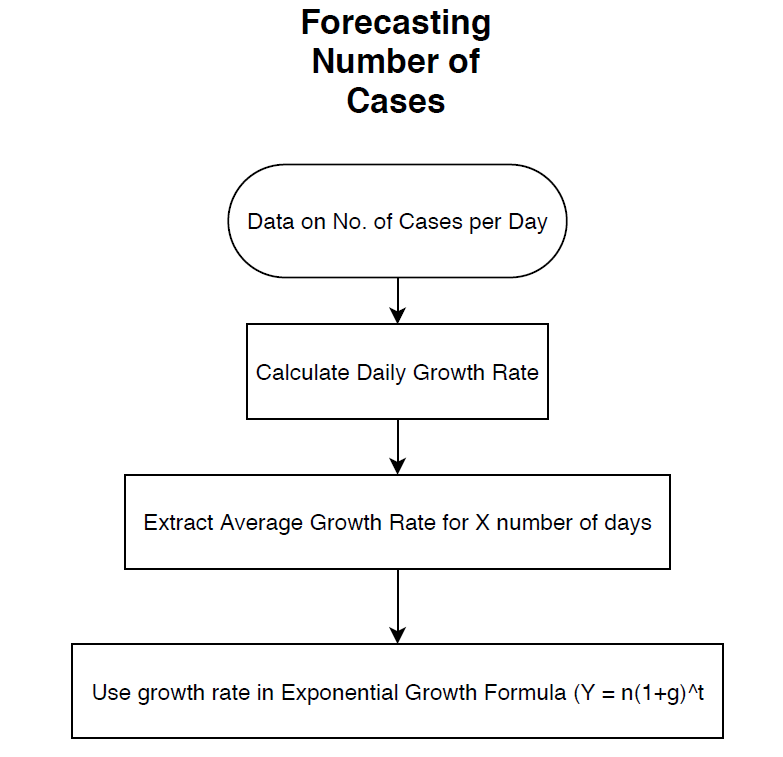

In [64]:
from IPython.display import Image, display
display(Image(filename='forecast_cases.png', embed=True))

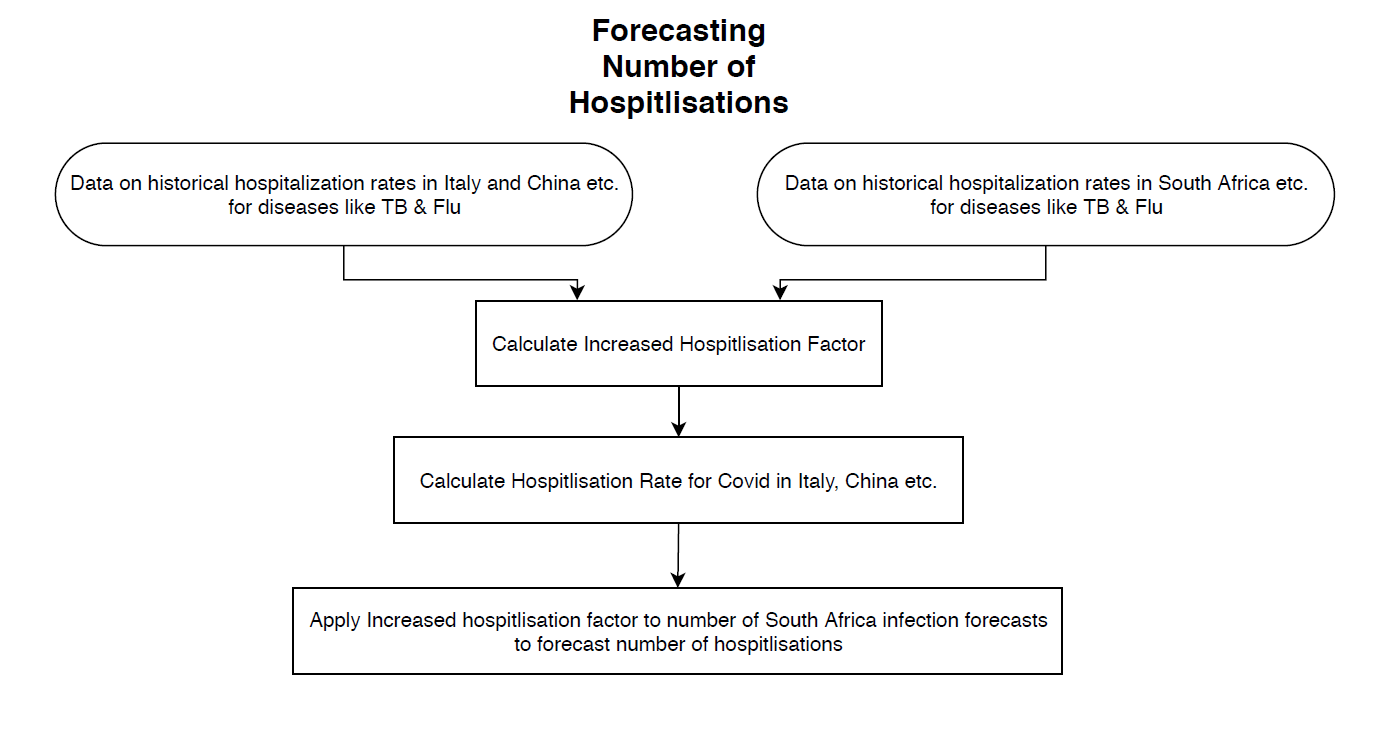

In [65]:
from IPython.display import Image, display
display(Image(filename='forecast_hospitalizations.png', embed=True))

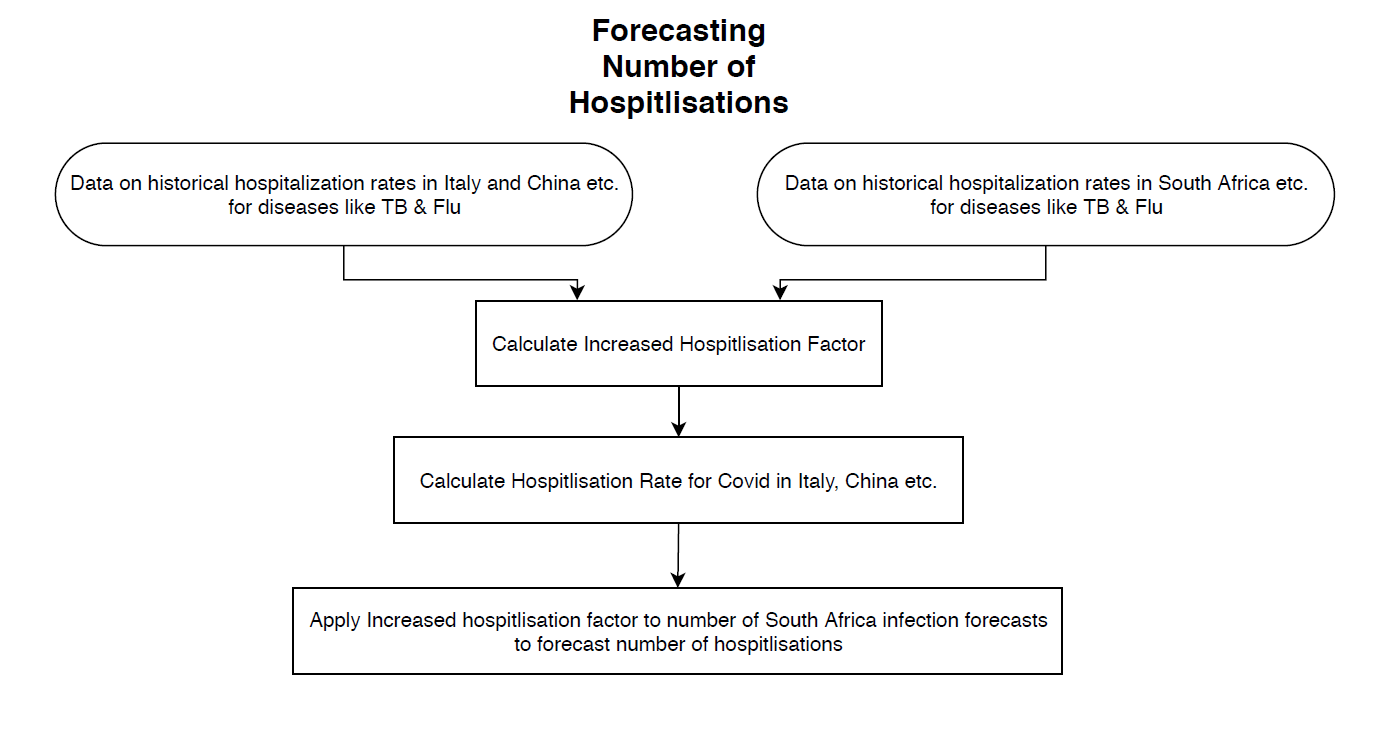

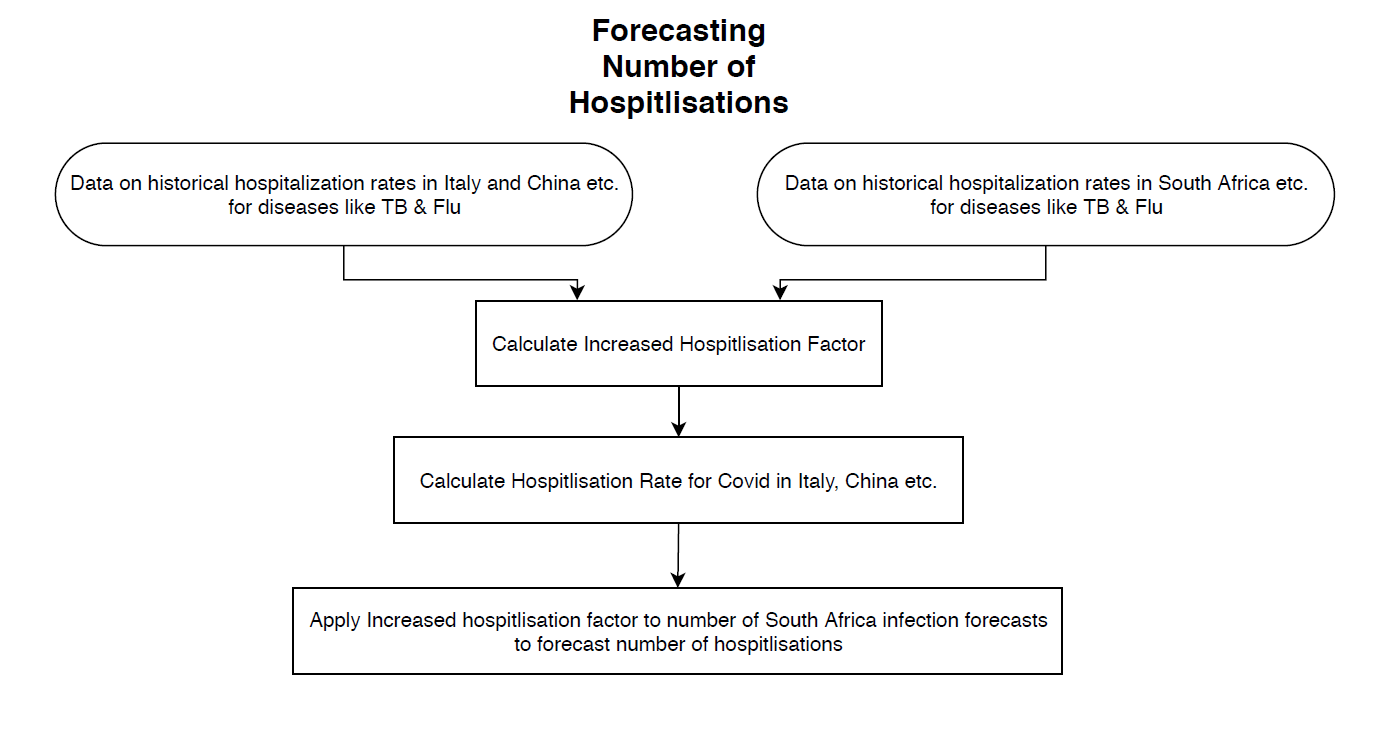

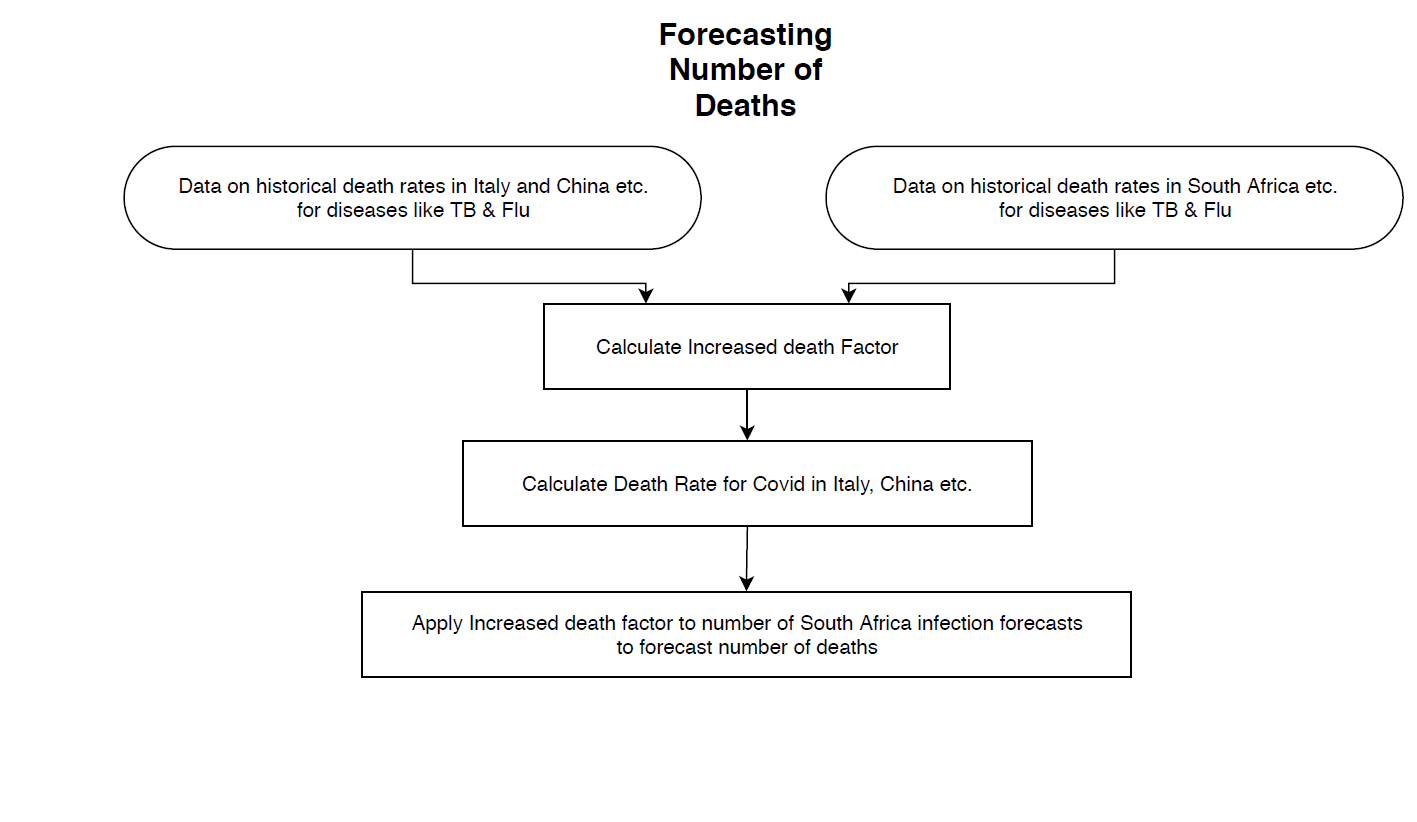

In [66]:
from IPython.display import Image, display
display(Image(filename='forecast_deaths.png', embed=True))